# STAT 301 Final Report

# Introduction: 


# Question: 

Can we predict the presence of heart disease in a patient using either an easily measurable subset of variables (sex, chest pain type, age, resting blood pressure) or the full variable list? 

## (2) Methods and Results

### a) “Exploratory Data Analysis (EDA)”

In [7]:
# Main developer: Michelle H. 
# Contributor: Anna M. 

library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(cowplot)



# Loading in the dataset from Kaggle 
heart_MH <- read.csv("heart.csv")


#Checking for missing values 
sum(is.na(heart_MH))


#Number of rows (observations) within the set 
head(heart_MH)
nrow(heart_MH)

[1] 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


[1] 1025

In [16]:
# Main developer: Anna M. 
# Contributor: None

# Convert categorical variables
heart_data <- 
    heart_MH %>%
    mutate(across(c(sex, cp, fbs, restecg, exang, slope, ca, thal, target), as.factor))

# Rename columns for easier understanding
heart_data <- heart_MH %>% 
rename(chest_pain_type = cp, cholesterol = chol, resting_bp = trestbps, fasting_blood_sugar = fbs, resting_ecg = restecg, max_heart_rate = thalach, exercise_induced_angina = exang, ST_depression = oldpeak, vessels_num = ca)

head(heart_data)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


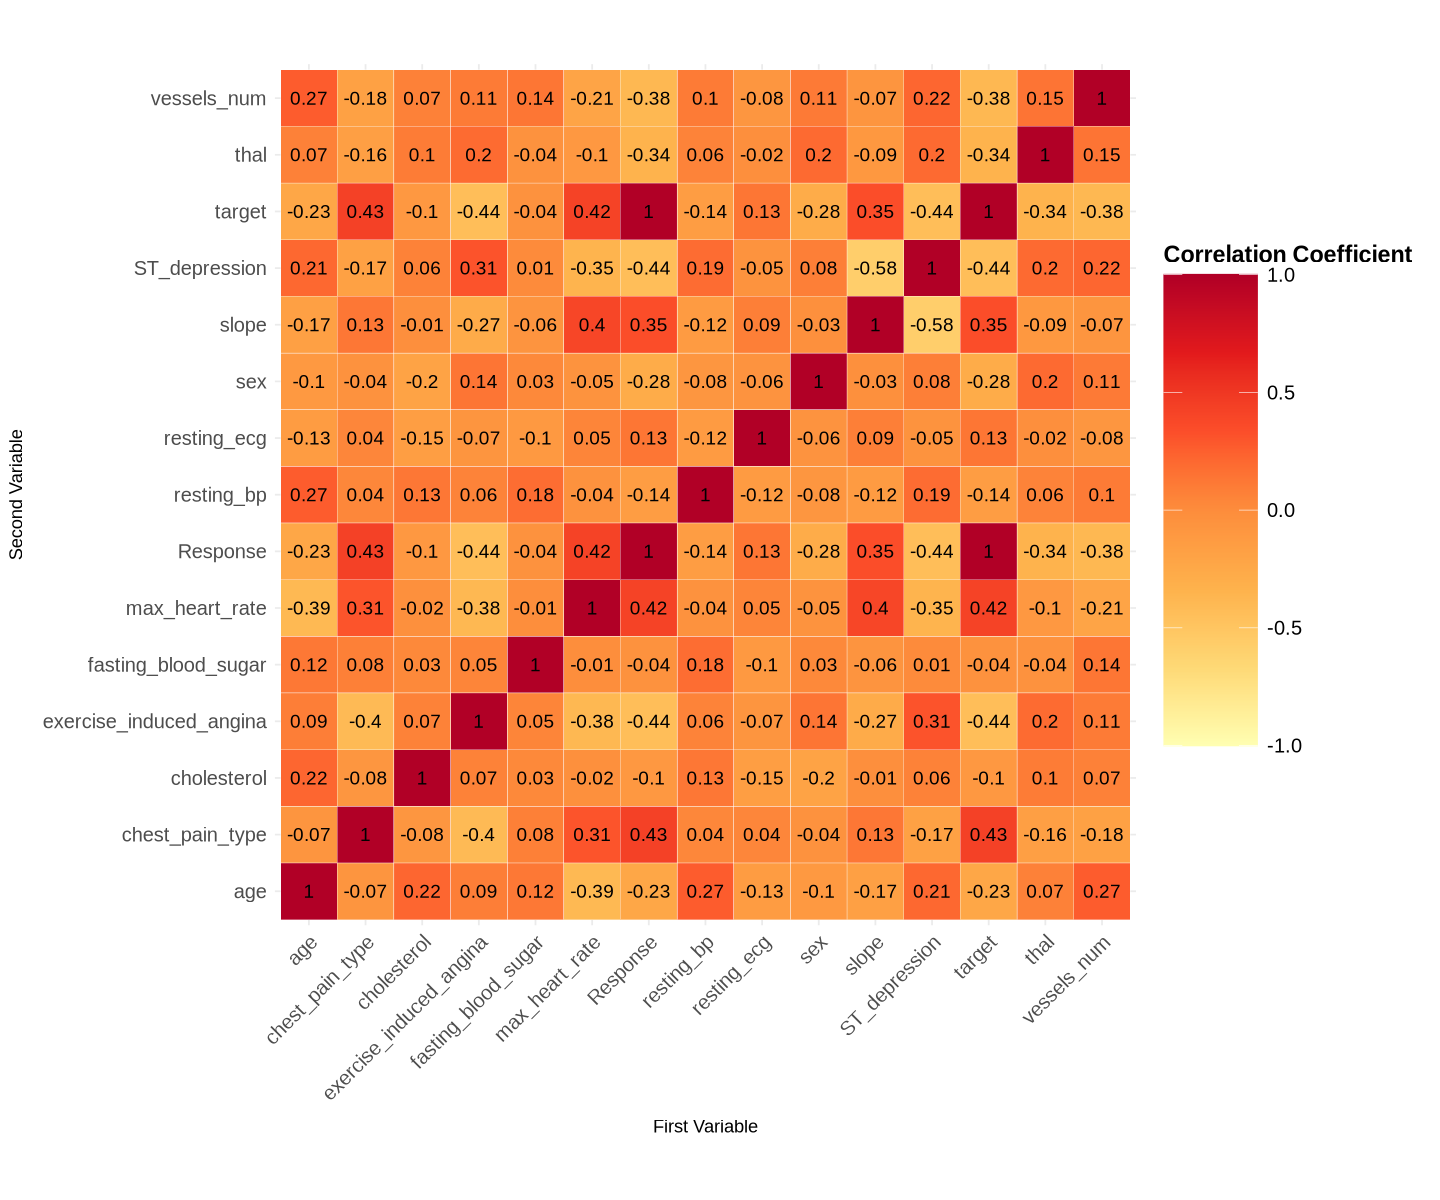

In [9]:
# Main developer: Vaibhav S.  
# Contributor: Michelle H., Anna M. 

#Correlation matrix 

corr_matrix_heart <- heart_data %>%
  mutate(Response = as.numeric(target)) %>%
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("variable1") %>%
  pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")


# Plotting the correlation matrix
options(repr.plot.width = 12, repr.plot.height = 10)
plot_corr_matrix_heart <- corr_matrix_heart %>%
  ggplot(aes(x = variable1, y = variable2)) +
  geom_tile(aes(fill = correlation), color = "white") +
  scale_fill_distiller(name = "Correlation Coefficient",
                       palette = "YlOrRd",
                       direction = 1, limits = c(-1, 1)) +
  labs(x = "First Variable", y = "Second Variable") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),
        axis.text.y = element_text(size = 12),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12),
        legend.key.size = unit(2, "cm")) +
  coord_fixed() +
  geom_text(aes(label = round(correlation, 2)), color = "black", size = 4)

# Display the correlation matrix plot
plot_corr_matrix_heart

### Interpretation: 
There is no significant correlation between any of the variables. 

We will create a couple graphs to represent the relationship between 